This notebook creates and then trains naive templates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy
from scipy.interpolate import interp1d

from modules import get_bandpass_dict, get_eff_wavelen, Sed, \
                    create_training_sets, train_templates

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

Load the filters

In [3]:
bandpass_dict = get_bandpass_dict()

Load the galaxy redshift catalog

In [4]:
with open('data/training_catalog.pkl', 'rb') as input:
    galaxies = pickle.load(input)

Create the naive templates

## N7

In [6]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 7
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [7]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N7_1:   70.6   47.8   42.1   40.0   39.0  
N7_2:  101.8   71.7   67.2   65.4  
N7_3:  113.6   77.6   74.7   73.3  
N7_4:  236.5  152.9  148.4  
N7_5:  435.4  269.5  260.1  256.3  
N7_6:  746.3  449.4  426.2  418.0  
N7_7: 1567.6  937.5  916.2  
Round 2
N7_1:   37.3   34.9   34.3  
N7_2:   57.5   49.9   49.2  
N7_3:   54.1   47.6   47.1  
N7_4:   85.7   78.0   77.4  
N7_5:  120.0  105.6  103.7  
N7_6:  236.2  216.4  214.1  
N7_7:  861.4  770.4  757.6  
Round 3
N7_1:   34.2  
N7_2:   56.0   49.7   49.3  
N7_3:   49.7   44.3   43.9  
N7_4:   71.3   66.9   66.5  
N7_5:   94.4   88.7   87.7  
N7_6:  162.2  158.0  
N7_7:  874.3  835.6  828.7  
Round 4
N7_1:   33.8  
N7_2:   57.6   52.6   52.1  
N7_3:   56.8   51.4   51.1  
N7_4:   58.2   55.0   54.7  
N7_5:   77.8   75.2   74.7  
N7_6:  123.7  121.4  
N7_7:  906.3  878.6  873.6  
Round 5
N7_1:   33.6  
N7_2:   60.8   55.6   55.1  
N7_3:   56.8   51.4   51.0  
N7_4:   56.0  
N7_5:   76.7  
N7_6:  131.9  129.6  
N7_7:  917.9  903.2  
R

Number of fluxes in each training set:
[38308, 37304, 48128, 70468, 107419, 81331, 28770]


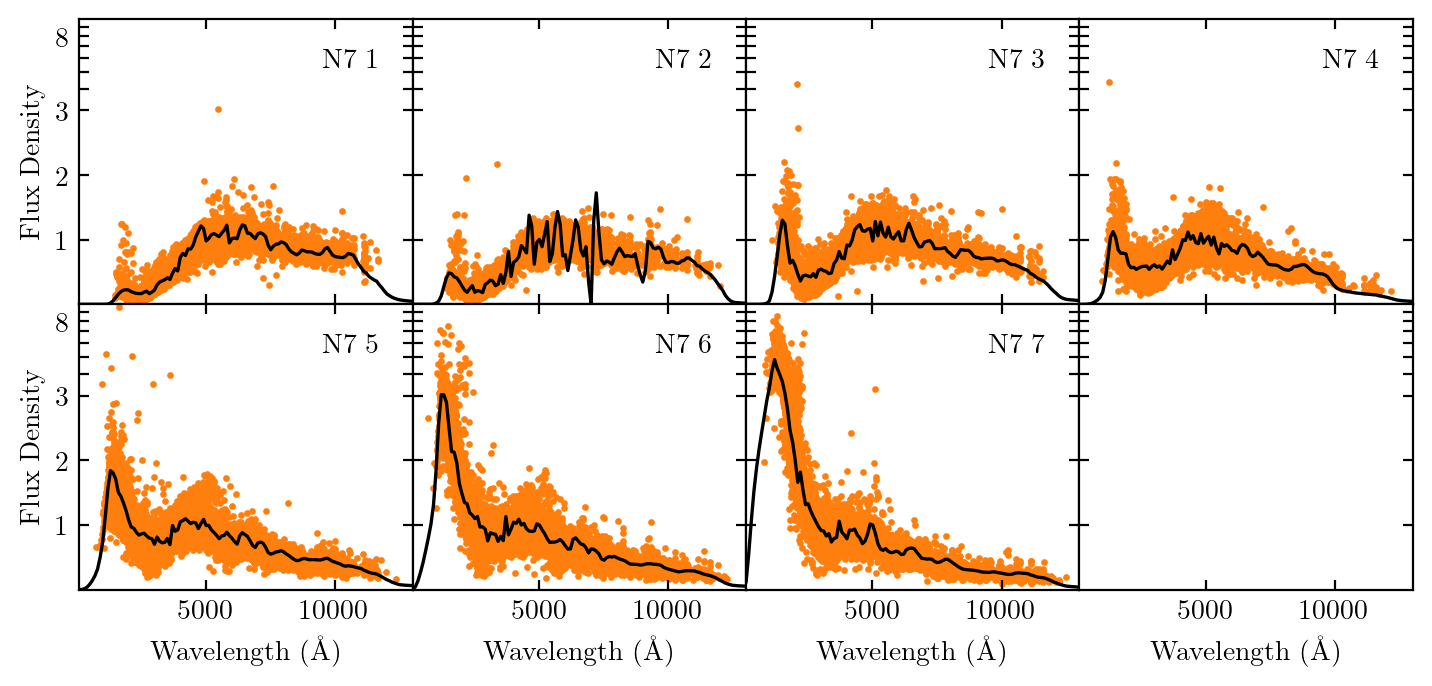

In [10]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 7:
        break
    
    wavelen = [row[0] for row in final_sets["N7_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N7_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N7_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N7 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [11]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N6

In [14]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 6
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [15]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N6_1:   71.8   50.5   45.0   43.0   42.0  
N6_2:  108.6   76.2   71.8   69.9  
N6_3:  140.3   91.6   88.5   87.0  
N6_4:  369.1  244.4  235.2  231.0  
N6_5:  677.8  405.5  383.7  375.6  
N6_6: 1583.7  946.4  925.4  
Round 2
N6_1:   39.5   37.0   36.5  
N6_2:   62.6   53.6   53.0  
N6_3:   56.8   50.4   50.0  
N6_4:  113.4  101.1  100.0  
N6_5:  200.7  184.8  183.1  
N6_6:  884.2  787.3  773.0  
Round 3
N6_1:   36.0  
N6_2:   59.5   52.5   52.0  
N6_3:   54.3   48.9   48.5  
N6_4:   93.8   88.0   87.3  
N6_5:  129.3  125.2  124.6  
N6_6:  883.9  848.9  842.5  
Round 4
N6_1:   35.6  
N6_2:   63.2   56.7   56.3  
N6_3:   53.0   47.7   47.4  
N6_4:   74.3   71.2   70.7  
N6_5:  137.7  135.2  
N6_6:  848.8  
Round 5
N6_1:   35.4  
N6_2:   66.0   60.1   59.7  
N6_3:   59.9   54.2   53.8  
N6_4:   71.1  
N6_5:  134.5  
N6_6:  802.2  782.9  
Round 6
N6_1:   35.2  
N6_2:   70.7   65.2   64.7  
N6_3:   58.9   54.6   54.3  
N6_4:   68.0   65.8   65.6  
N6_5:  115.7  113.6  
N6_6:  886.3  

Number of fluxes in each training set:
[43396, 42594, 63550, 105679, 117929, 38580]


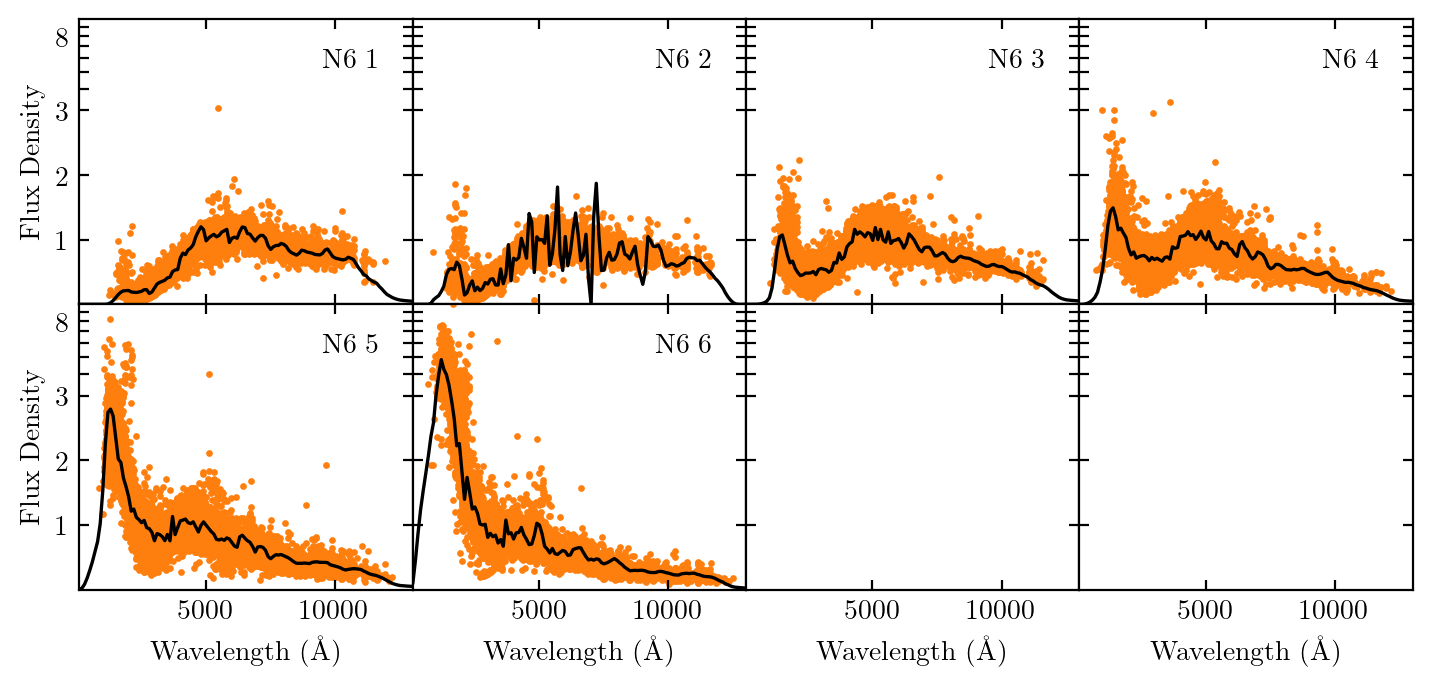

In [16]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 6:
        break
    
    wavelen = [row[0] for row in final_sets["N6_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N6_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N6_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N6 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [17]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N5

In [18]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 5
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [19]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N5_1:   73.0   53.2   48.0   46.0   45.0  
N5_2:  124.3   84.7   80.1   78.1  
N5_3:  232.8  149.9  143.8  140.9  
N5_4:  584.0  366.9  349.3  341.9  
N5_5: 1584.9  945.1  923.5  
Round 2
N5_1:   61.8   59.1   58.6  
N5_2:   64.9   54.8   54.2  
N5_3:   80.9   71.4   70.7  
N5_4:  192.6  174.4  172.7  
N5_5:  676.0  598.3  586.4  
Round 3
N5_1:   38.6   36.4   36.1  
N5_2:  101.4   92.8   92.3  
N5_3:   73.1   67.7   67.2  
N5_4:  128.2  123.3  122.6  
N5_5:  604.4  576.0  571.0  
Round 4
N5_1:   36.9  
N5_2:   64.7   57.4   57.0  
N5_3:   69.1  
N5_4:  122.3  
N5_5:  786.2  770.7  
Round 5
N5_1:   36.8  
N5_2:   65.3   60.1   59.7  
N5_3:   63.4   58.7   58.4  
N5_4:  124.4  
N5_5:  802.9  789.1  
Round 6
N5_1:   36.2  
N5_2:   69.8   65.2   64.9  
N5_3:   72.9   69.0   68.6  
N5_4:  111.3  108.4  
N5_5:  823.9  810.6  
Round 7
N5_1:   36.0  
N5_2:   72.9   68.8   68.4  
N5_3:   70.3  
N5_4:  112.8  110.5  
N5_5:  847.5  833.6  
Round 8
N5_1:   36.1  
N5_2:   77.7   74.0   73.

2
Number of fluxes in each training set:
[52599, 46189, 94101, 161061, 57778]


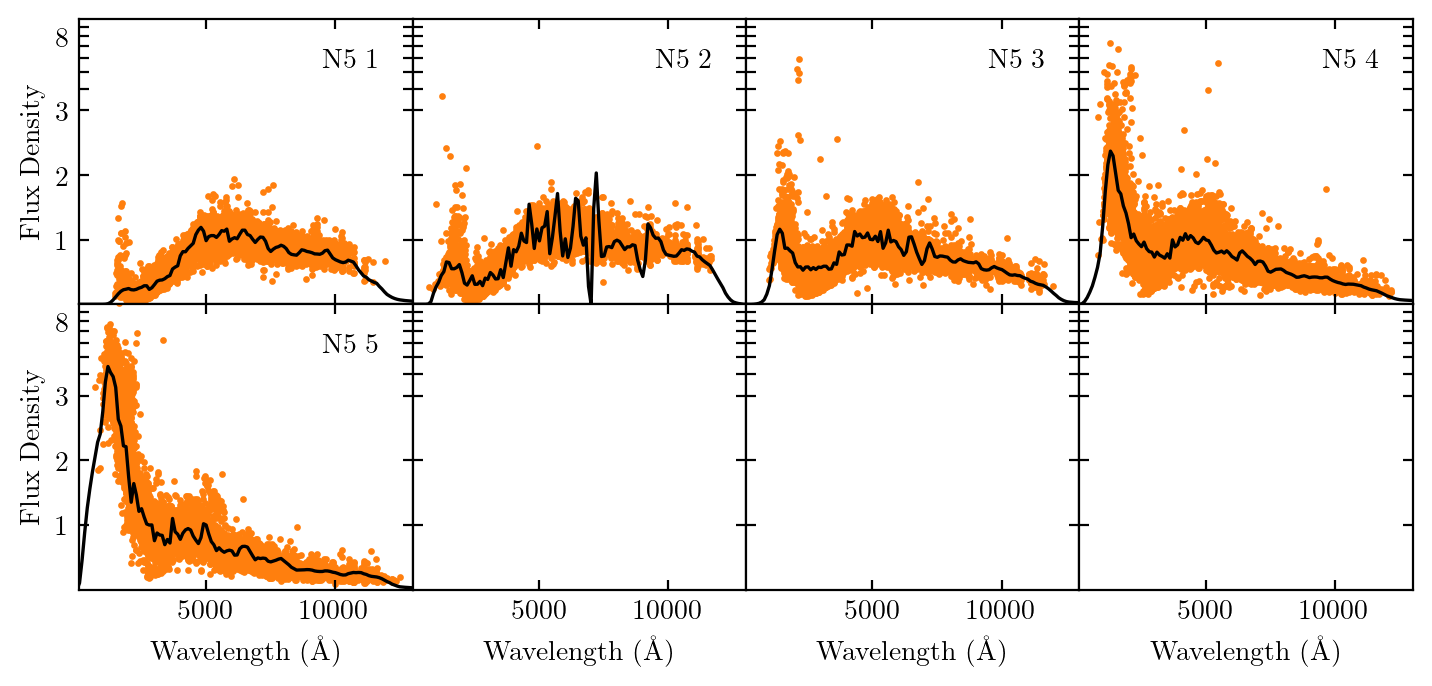

In [24]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 5:
        break
    
    wavelen = [row[0] for row in final_sets["N5_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N5_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N5_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N5 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [25]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N4

In [26]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 4
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [27]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N4_1:   77.3   58.4   53.5   51.5   50.6  
N4_2:  160.2  100.0   94.5   92.2  
N4_3:  435.9  271.9  260.0  254.4  
N4_4: 1633.1  984.7  963.0  
Round 2
N4_1:   43.7   40.7   40.2  
N4_2:   82.6   70.3   69.5  
N4_3:  145.5  129.8  128.2  
N4_4:  799.9  736.1  726.4  
Round 3
N4_1:   41.8   39.6   39.3  
N4_2:   78.3   68.5   67.9  
N4_3:  107.7  102.2  101.5  
N4_4:  758.9  733.7  730.3  
Round 4
N4_1:   39.8  
N4_2:   78.1   71.0   70.5  
N4_3:  109.8  105.6  105.2  
N4_4:  693.6  679.9  
Round 5
N4_1:   39.3  
N4_2:  119.7  113.3  112.8  
N4_3:  112.7  109.6  
N4_4:  502.7  491.5  
Round 6
N4_1:   38.2  
N4_2:   81.5   75.5   75.1  
N4_3:  148.4  145.5  
N4_4:  506.4  496.5  
Round 7
N4_1:   38.3  
N4_2:   88.8   83.6   83.2  
N4_3:  111.7  108.9  
N4_4:  648.1  639.4  
Round 8
N4_1:   37.8  
N4_2:   91.8   87.6   87.3  
N4_3:  161.8  158.6  
N4_4:  506.6  498.9  
Round 9
N4_1:   38.2  
N4_2:   96.8   92.6   92.2  
N4_3:  114.4  111.6  
N4_4:  665.1  657.8  
Round 10
N4_1:   

Number of fluxes in each training set:
[69751, 84905, 163880, 93192]


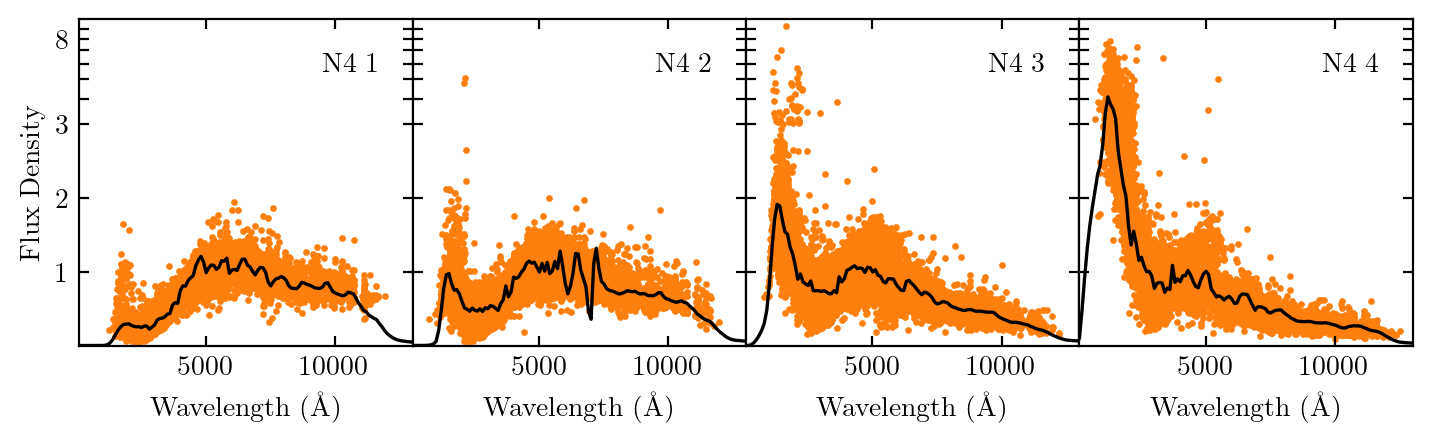

In [35]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol/3.3))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 5:
        break
    
    wavelen = [row[0] for row in final_sets["N4_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N4_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N4_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N4 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
ax = axes[0]
ax.set_ylabel('Flux Density')
ax.set_yscale('symlog',linthreshy=3)
ax.set_ylim(0,10)
ax.set_yticks([1,2,3,4,5,6,7,8,9])
ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [36]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N9

In [37]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 9
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [38]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N9_1:   70.8   45.0   38.8   36.7   35.7  
N9_2:   98.1   67.9   63.4   61.6  
N9_3:   97.7   71.2   67.9   66.3  
N9_4:  115.7   77.1   74.9  
N9_5:  205.1  131.7  128.4  
N9_6:  343.8  219.8  211.4  207.4  
N9_7:  497.0  301.8  289.0  283.7  
N9_8:  857.4  502.2  480.8  474.8  
N9_9: 1562.3  937.0  914.4  
Round 2
N9_1:   34.3   31.7   31.2  
N9_2:   55.9   49.5   48.7  
N9_3:   47.8   42.1   41.5  
N9_4:   53.0   48.3   48.1  
N9_5:   66.4   60.7   60.3  
N9_6:   95.0   83.8   82.5  
N9_7:  134.1  114.5  112.9  
N9_8:  308.9  282.0  278.3  
N9_9:  894.2  
Round 3
N9_1:   32.7   31.0   30.7  
N9_2:   50.9   46.5   46.1  
N9_3:   45.8   41.6   41.2  
N9_4:   45.2   41.3   41.1  
N9_5:   54.8   51.7   51.4  
N9_6:   64.4   61.1   60.6  
N9_7:   96.0   90.3   89.4  
N9_8:  242.1  229.3  226.5  
N9_9:  899.1  
Round 4
N9_1:   31.7   30.4   30.1  
N9_2:   48.1   44.8   44.5  
N9_3:   44.8   40.8   40.4  
N9_4:   43.6   40.0   39.8  
N9_5:   49.7   47.9   47.7  
N9_6:   51.8   49.8

Number of fluxes in each training set:
[39787, 33832, 33803, 41496, 54084, 76859, 66563, 47959, 17345]


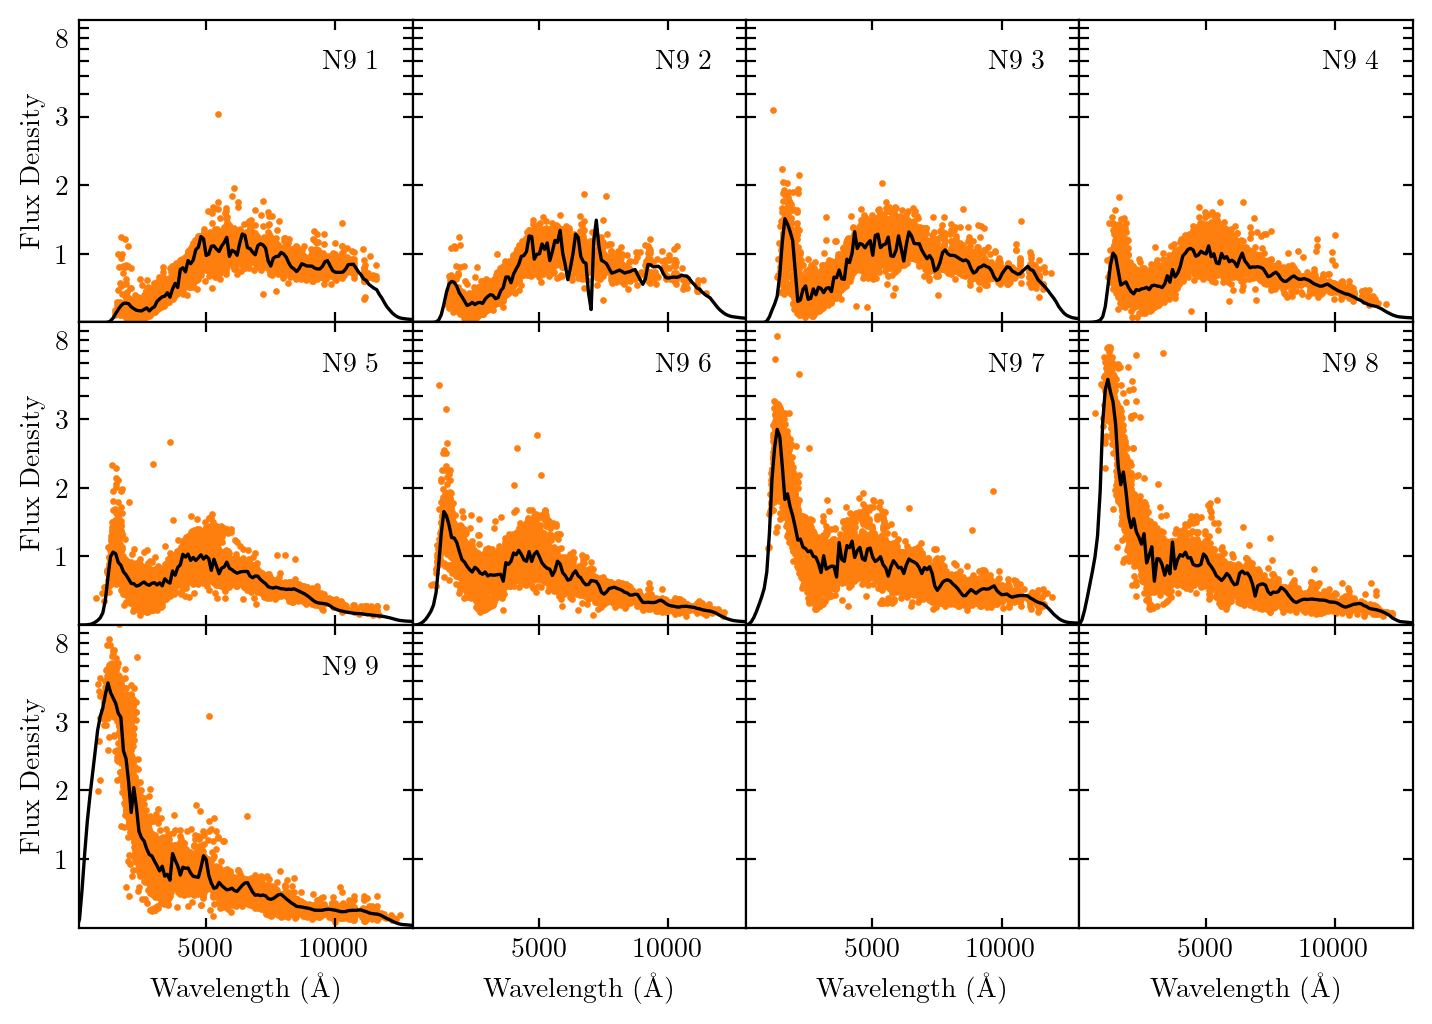

In [39]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 9:
        break
    
    wavelen = [row[0] for row in final_sets["N9_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N9_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N9_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N9 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [40]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N10

In [5]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 10
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [6]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N10_1:   71.8   44.5   38.2   36.0   35.1  
N10_2:  100.4   69.3   64.7   62.9  
N10_3:   89.7   65.5   62.2   60.6  
N10_4:   95.1   64.7   62.2   61.0  
N10_5:  131.9   83.7   81.9  
N10_6:  298.4  194.6  189.0  
N10_7:  380.7  237.1  229.1  225.8  
N10_8:  480.5  278.1  262.5  255.6  
N10_9:  980.4  584.0  563.4  558.0  
N10_10: 1563.1  938.5  915.9  
Round 2
N10_1:   34.0   31.2   30.7  
N10_2:   54.5   49.3   48.5  
N10_3:   49.1   43.5   42.9  
N10_4:   49.9   45.6   45.2  
N10_5:   45.6   41.7   41.5  
N10_6:   73.6   67.5   66.9  
N10_7:  107.2   91.4   89.7  
N10_8:  121.6  103.3  102.0  
N10_9:  318.5  296.7  293.4  
N10_10:  943.4  826.8  811.6  
Round 3
N10_1:   31.7   30.2   29.9  
N10_2:   48.4  
N10_3:   43.1  
N10_4:   45.0  
N10_5:   32.9   31.2   31.1  
N10_6:   75.8   71.7   71.3  
N10_7:   78.0   72.8   72.1  
N10_8:   94.0   89.9   89.4  
N10_9:  201.5  195.8  
N10_10: 1002.8  948.6  941.7  
Round 4
N10_1:   31.1   30.1   29.9  
N10_2:   46.0   42.1   41.7 

Number of fluxes in each training set:
[27217, 25557, 32046, 35335, 51845, 42129, 59025, 78999, 44620, 14955]


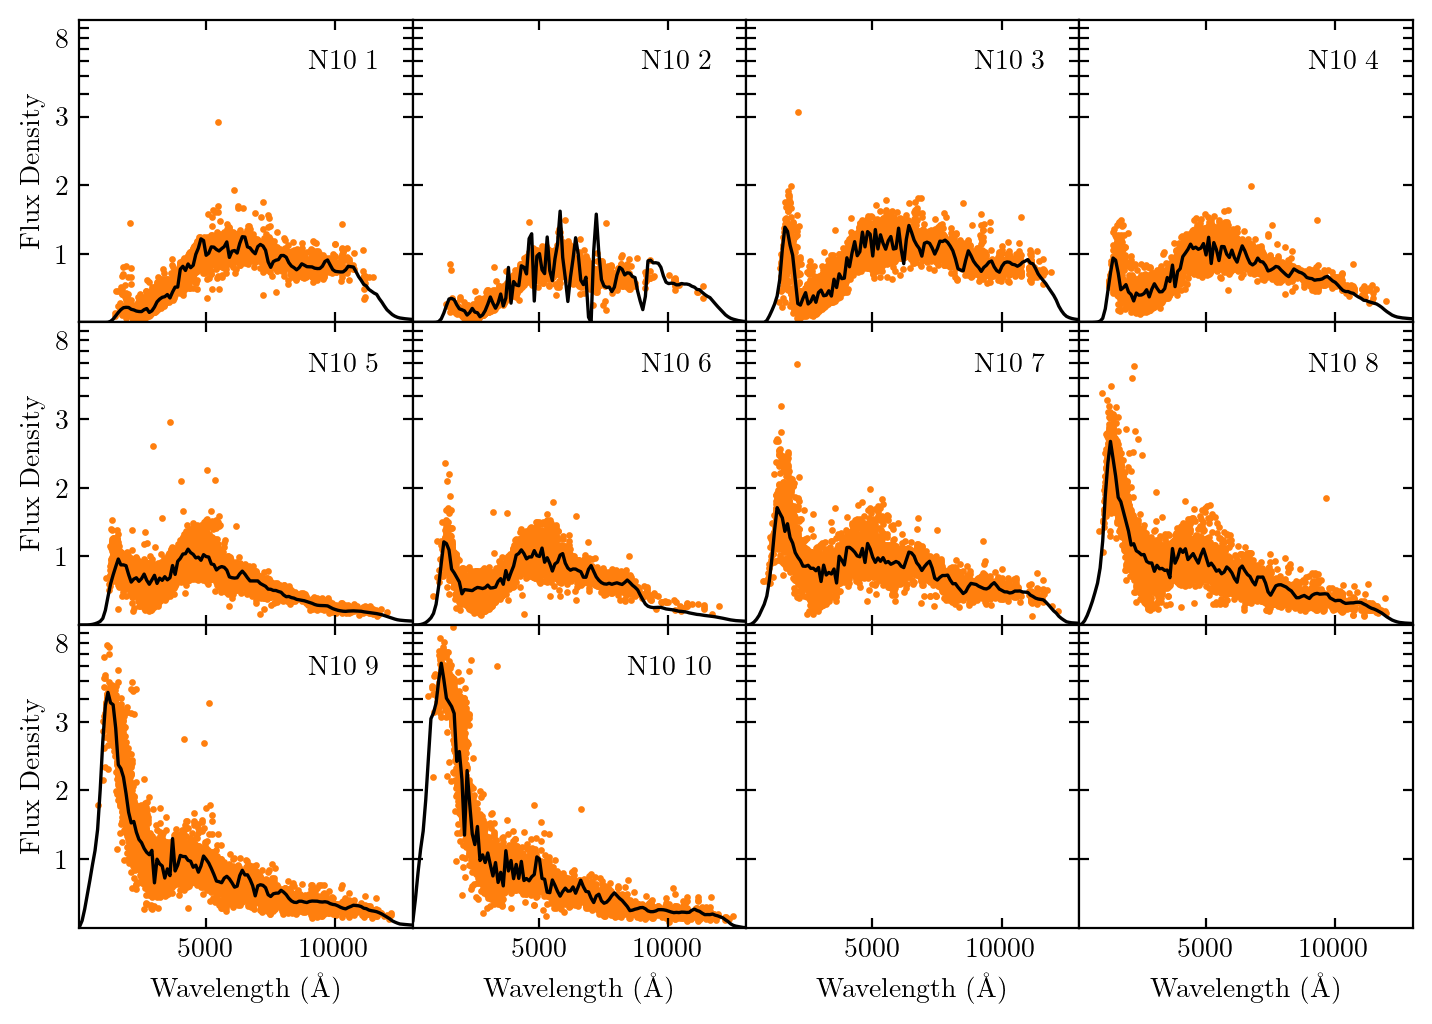

In [12]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 10:
        break
    
    wavelen = [row[0] for row in final_sets["N10_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N10_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N10_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N10 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [13]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

# N11

In [14]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 11
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [15]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N11_1:   72.6   44.2   37.8   35.5   34.6  
N11_2:   97.2   66.1   61.4   59.7  
N11_3:   90.7   66.5   63.1   61.4  
N11_4:   96.5   68.5   65.9   64.6  
N11_5:  118.5   77.2   75.3  
N11_6:  198.7  127.7  125.3  
N11_7:  360.5  253.3  246.0  
N11_8:  343.2  203.7  195.2  191.7  
N11_9:  535.4  305.3  288.4  281.7  
N11_10: 1001.0  581.2  559.2  553.3  
N11_11: 1568.0  945.6  923.2  
Round 2
N11_1:   33.4   30.8   30.3  
N11_2:   54.3   48.2   47.2  
N11_3:   47.7   42.3   41.7  
N11_4:   40.5   36.7   36.1  
N11_5:   43.8   40.4   40.2  
N11_6:   52.5   48.0   47.8  
N11_7:   74.5   68.7   68.1  
N11_8:  125.2  103.2  101.2  
N11_9:  171.6  151.4  149.6  
N11_10:  325.5  295.9  291.5  
N11_11:  928.2  
Round 3
N11_1:   32.2   30.6   30.3  
N11_2:   46.5  
N11_3:   42.6  
N11_4:   42.4   39.0   38.6  
N11_5:   38.9   36.5   36.4  
N11_6:   59.8   56.5   56.3  
N11_7:   34.9   33.3   33.1  
N11_8:   79.2   72.4   71.6  
N11_9:   97.6   94.2   93.5  
N11_10:  317.0  289.0  283.7

Number of fluxes in each training set:
[33467, 28409, 28832, 24615, 34890, 58024, 73559, 35416, 50593, 30403, 13520]


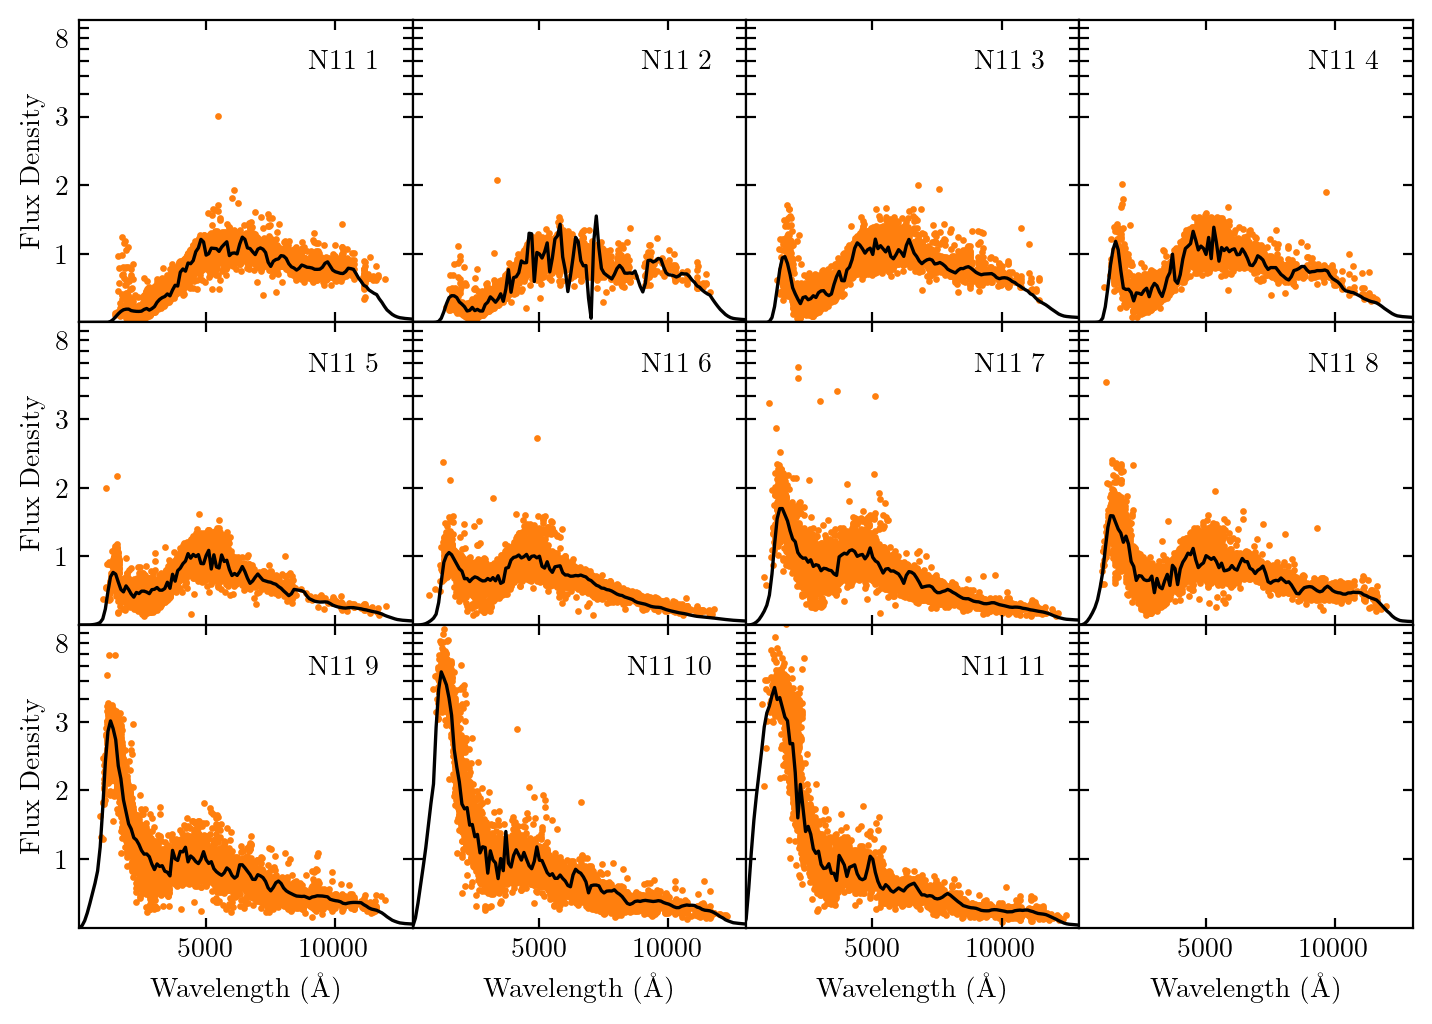

In [17]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 11:
        break
    
    wavelen = [row[0] for row in final_sets["N11_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N11_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N11_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N11 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [18]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()

## N12

In [19]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 12
modes  = np.linspace(5500,1000,N)
sigmas = np.linspace(0.35,0.9,N)

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N"+str(N)+"_"+str(i+1)] = template

In [20]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmse_stop=0.03, verbose=True)

Round 1
N12_1:   73.3   44.0   37.4   35.1   34.1  
N12_2:  101.9   68.5   63.7   61.9  
N12_3:   84.5   62.5   59.3   57.7  
N12_4:   89.2   64.1   61.4   60.0  
N12_5:  104.1   69.2   67.3  
N12_6:  142.0   90.3   88.5  
N12_7:  222.8  143.3  139.9  
N12_8:  270.9  163.2  156.8  153.8  
N12_9:  377.0  218.4  208.0  203.3  
N12_10:  588.7  332.4  315.0  308.7  
N12_11: 1040.2  621.3  601.1  596.0  
N12_12: 1600.0  969.5  946.0  
Round 2
N12_1:   33.7  
N12_2:   48.9   44.1   43.3  
N12_3:   51.2   45.6   44.9  
N12_4:   45.8   41.3   40.6  
N12_5:   44.7   41.1   40.8  
N12_6:   48.1   44.7   44.4  
N12_7:   51.0   46.9   46.6  
N12_8:   80.0   67.3   65.9  
N12_9:  101.7   82.1   80.4  
N12_10:  202.2  182.2  180.0  
N12_11:  282.6  257.6  254.0  
N12_12:  986.2  866.2  851.0  
Round 3
N12_1:   33.5  
N12_2:   49.3   45.1   44.5  
N12_3:   46.1  
N12_4:   41.9   38.7   38.2  
N12_5:   38.2   35.8   35.7  
N12_6:   45.9   43.0   42.9  
N12_7:   45.8  
N12_8:   68.5   63.1   62.7  
N12

Number of fluxes in each training set:
[30598, 31962, 31666, 30884, 23917, 48842, 54317, 43526, 29801, 43584, 30898, 11733]


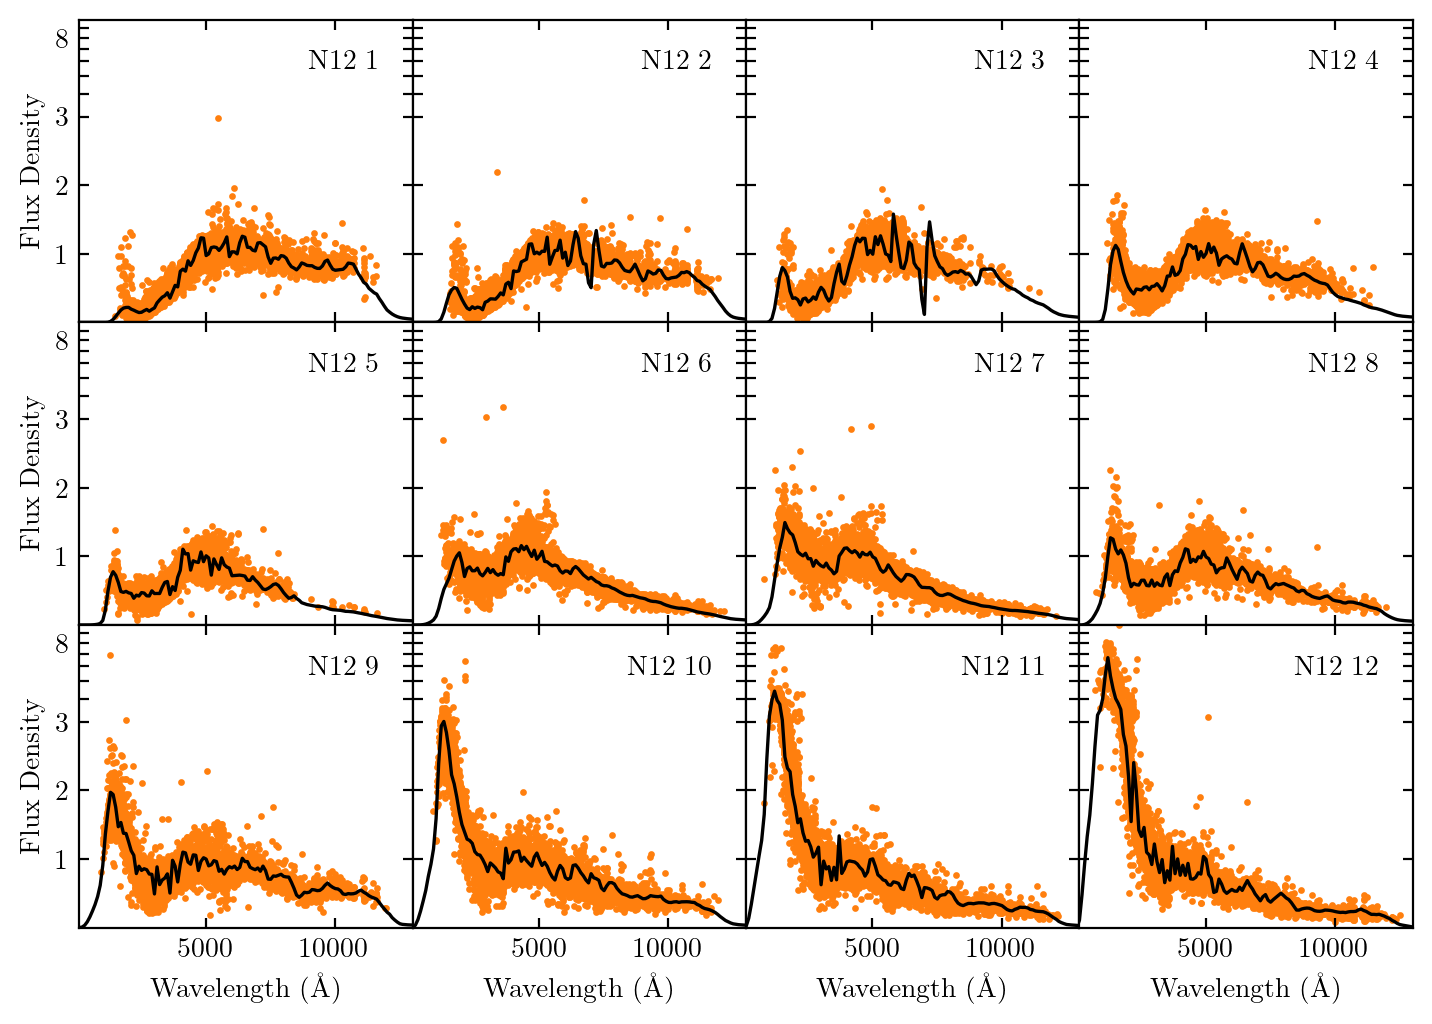

In [21]:
ncols = 4
nrows = int(len(trained_templates)/ncols+0.99)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    if i == 12:
        break
    
    wavelen = [row[0] for row in final_sets["N12_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N12_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N12_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N12 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','',8,''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

In [22]:
for template in trained_templates:
    file = open('templates/'+template+'.sed','w')
    x = trained_templates[template].wavelen
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.4f}\n".format(x[i],y[i]))
    file.close()